In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
from pandas.plotting import table

import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers.ldamallet import malletmodel2ldamodel

from matplotlib import pyplot as plt

from statistics import mean

<bound method Figure.savefig of <Figure size 432x288 with 2 Axes>>

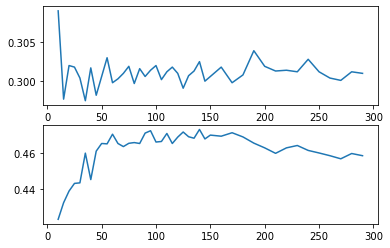

In [100]:
gs_path = Path(r"C:\Users\martin\git\master-thesis\6_evaluation\figures\coherence_development_original_seg500.txt")
gs_x = []
gs_y =[]

with gs_path.open("r") as f:
    for l in f.readlines():
        gs_x.append(float(l.split(" ")[0].strip()))
        gs_y.append(float(l.split(" ")[1].strip()))

#first graph


#second graph
mallet_path = Path(r"C:\Users\martin\git\master-thesis\6_evaluation\figures\coherence_development_original_seg500_mallet.txt")
mallet_x = []
mallet_y = []

with mallet_path.open("r") as f:
    for l in f.readlines():
        mallet_x.append(float(l.split(" ")[0].strip()))
        mallet_y.append(float(l.split(" ")[1].strip()))

fig, axs = plt.subplots(2)
axs[0].plot(gs_x, gs_y,)
axs[1].plot(mallet_x, mallet_y)
fig.savefig

Vergleich MALLET und Gensim über 300 Topics

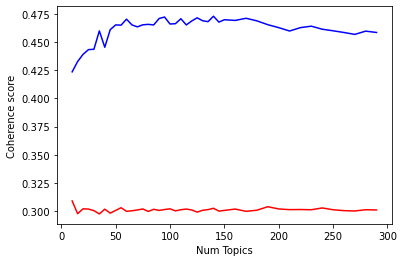

In [101]:
plt.plot(gs_x, gs_y, "r", mallet_x, mallet_y, "b")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [102]:
print(mean(gs_y))
print(mean(mallet_y))

0.3011023255813953
0.46156976744186046


In [103]:
print(min(gs_y))
sorted_gs = sorted(gs_y)
print(sorted_gs[-2])

0.2975
0.3039


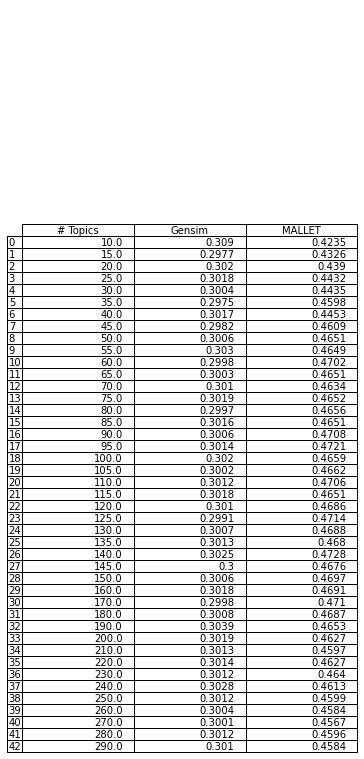

In [104]:
df = pd.DataFrame({"# Topics": gs_x,
                   "Gensim": gs_y,
                   "MALLET": mallet_y}, columns=["# Topics", "Gensim", "MALLET"])
df.set_index("# Topics", drop=True)
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)


In [105]:
type = "mallet"  # "mallet" | "gensim" | "all"
seglen = 500
topic_count = 60
measure = "c_v"

file = Path(r"C:\Users\martin\git\master-thesis\5_corpus\seglen-500\original-500.txt")
print("File: " + file.stem)
# splitting lines to docs
documents = read_file(file)
# build a dictionary
print("--Creating Dictionary")
dictionary = corpora.Dictionary(documents)
# Turns each document into a bag of words.
print("--Creating Doc2Bow")
corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in documents]
lda_model = create_tm(dictionary, corpus, type, topic_count)
# create coherence model
coh_model = CoherenceModel(model=lda_model, texts=documents, coherence=measure)

File: original-500
--Creating Dictionary
--Creating Doc2Bow


NameError: name 'create_tm' is not defined

# Coherence Variance Plotting

In [3]:
def read_file(file):
    docs = []
    for l in file.open().readlines():
        doc = l.split(" ")
        docs.append(doc)
    return docs

MALLET Models

In [4]:
source_texts = read_file(Path(r"C:\Users\martin\git\master-thesis\5_corpus\seglen-500\original-500.txt"))
mallet_dir = Path(r"C:\Users\martin\git\master-thesis\6_evaluation\coherence-variance\mallet")
mallet_models = []
mallet_coherences = []
for file in sorted(mallet_dir.glob("tm*")):
    converted = malletmodel2ldamodel(LdaModel.load(str(file)))
    coherence_model = CoherenceModel(model=converted, texts=source_texts, coherence="c_v")
    mallet_models.append(converted)
    mallet_coherences.append(coherence_model)

In [ ]:
m_coherences = [round(m.get_coherence(), 3) for m in mallet_coherences]
m_coherences.sort()

In [ ]:
df = pd.DataFrame(m_coherences)
df.to_latex(index=False)

In [ ]:
plt.bar(x=[i for i in range(0, 10)], height=sorted(m_coherences))
plt.xlabel("Topic")
plt.ylabel("Coherence")
#plt.yscale('log')
plt.show()

In [ ]:
round(mean(m_coherences),3)

Gensim Models

In [ ]:
gensim_dir = Path(r"C:\Users\martin\git\master-thesis\6_evaluation\coherence-variance\gensim")
g_coh_models= []
for file in sorted(gensim_dir.glob("coh*.bin")):
    print(file.stem)
    coh = CoherenceModel.load(str(file))
    g_coh_models.append(coh)

In [94]:
g_coherences = [round(m.get_coherence(), 3) for m in g_coh_models]

In [96]:
round(mean(g_coherences), 3)

0.301

In [97]:
sorted(g_coherences)

[0.299, 0.3, 0.3, 0.3, 0.301, 0.301, 0.302, 0.303, 0.303, 0.304]

Convert CSV to Pandas Dataframe

In [24]:
df = pd.read_csv(r"C:\Users\martin\git\master-thesis\6_evaluation\palmetto\original-500-60.csv", sep="\t")
df.mean()
print(df.iloc[:, : 7].to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
       0 &        1 &        2 &        3 &        4 &        5 &        6 \\
\midrule
1.000000 & 2.000000 & 3.000000 & 4.000000 & 5.000000 & 6.000000 & 7.000000 \\
0.511764 & 0.470319 & 0.515498 & 0.478563 & 0.507073 & 0.461333 & 0.477741 \\
\bottomrule
\end{tabular}

